**NETWORK AV DC FILTER**

# **FIKS FOR FUCK SAKE**

Frekvensen hvor dempingen er nærmest -3 dB: 32.22083418496021 Hz


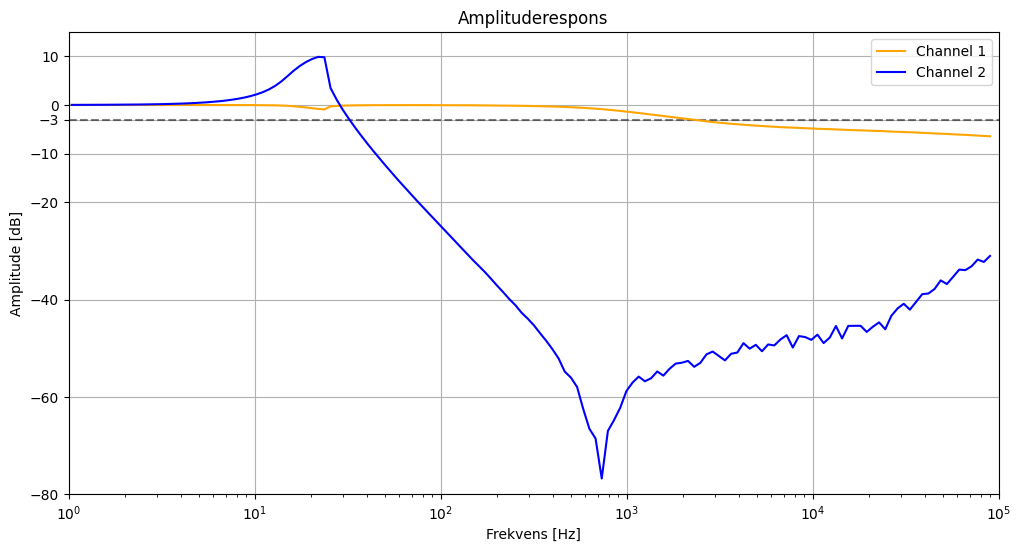

In [18]:
import numpy as np
import matplotlib.pyplot as plt 
import csv
import os

header = []
data = []
filename = "Målinger/DC filter Network 1-100k Hz.csv"
# Henter data fra csvfil
if not os.path.isfile(filename):
    raise FileNotFoundError(f"The file '{filename}' does not exist. Please check the file path and try again.")

with open(filename) as csvfile:
    csvreader = csv.reader(csvfile)
    # Leser første linje i csv-fila (den med navn til kanalene)
    header = next(csvreader)
    for datapoint in csvreader:
        values = [float(value) for value in datapoint]
        data.append(values)

# Legger inn data fra hver kanal i hver sin liste
frekvens = [(p[0]) for p in data]
ch1 = [(p[1]) for p in data]
ch2 = [(p[2]) for p in data]

# Finn frekvensen hvor dempingen er nærmest -3 dB for ch1
if len(frekvens) != len(ch1):
    raise ValueError("Listene 'frekvens' og 'ch1' må ha samme lengde.")
if not frekvens or not ch1:
    raise ValueError("Listene 'frekvens' og 'ch1' kan ikke være tomme.")

target_damping = -3
closest_freq = None
closest_diff = float('inf')

for freq, amp in zip(frekvens, ch2):
    diff = abs(amp - target_damping)
    if diff < closest_diff:
        closest_diff = diff
        closest_freq = freq

print(f"Frekvensen hvor dempingen er nærmest -3 dB: {closest_freq} Hz")

# Angi ønsket størrelse på figuren (rektangulær)
fig, chanel1 = plt.subplots(figsize=(12, 6))  # Bredde=12, høyde=6

# Plot ch1
x_start = 1  # Start fra 1 Hz for å unngå problemer med log-skala
x_end = 100000  # 100 kHz

chanel1.axhline(y=-3, color='black', linestyle='--', alpha=0.5)

y_dbstart = -80
y_dbend = 15

# Sett y-aksen til å bare vise spesifikke verdier
chanel1.set_yticks([10, 0, -3, -10, -20, -40, -60, -80])

chanel1.set_ylim(y_dbstart, y_dbend)

# Zoom inn på x-aksen
chanel1.set_xlim(x_start, x_end)
chanel1.grid(True)
# Oppdater plottene
chanel1.set_title("Amplituderespons")
chanel1.set_xlabel('Frekvens [Hz]')
chanel1.set_ylabel('Amplitude [dB]')
chanel1.set_xscale('log')

fig.canvas.draw()
chanel1.plot(frekvens, ch1, color='orange', label='Channel 1')  # Plot ch1
chanel1.plot(frekvens, ch2, color='blue', label='Channel 2')

# Legg til legend
chanel1.legend()

plt.savefig('Network_av_andre_prøving.png', dpi=300)

Frekvensen hvor dempingen er nærmest -3 dB: 27.12272579332027 Hz


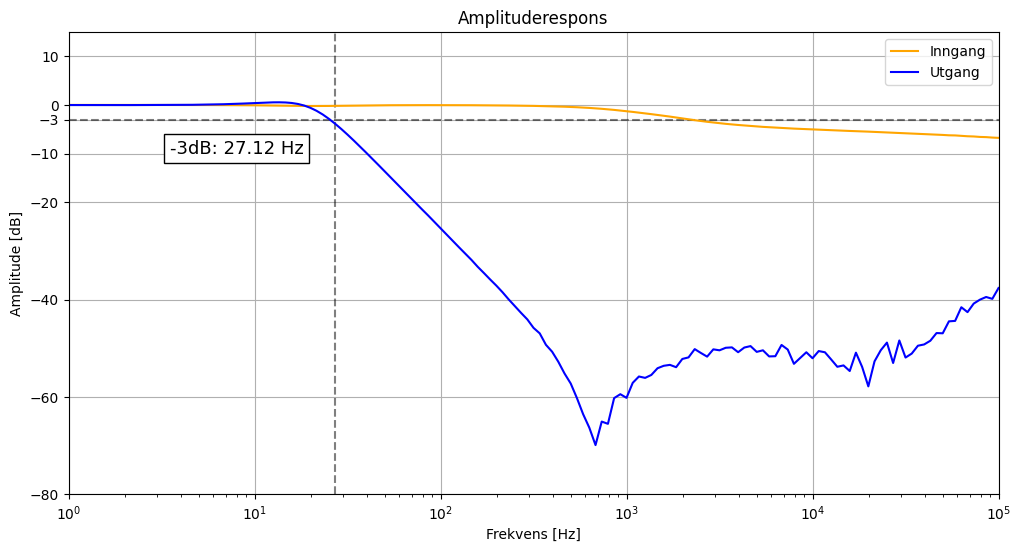

In [53]:
import numpy as np
import matplotlib.pyplot as plt 
import csv
import os

header = []
data = []
filename = "/Users/tordtranum/Desktop/6.semester/Sensorer/Lab/Lab_1–måleoppsett/Målinger/DC filter network 15ohm 1-100k Hz.csv"
# Henter data fra csvfil
if not os.path.isfile(filename):
    raise FileNotFoundError(f"The file '{filename}' does not exist. Please check the file path and try again.")

with open(filename) as csvfile:
    csvreader = csv.reader(csvfile)
    # Leser første linje i csv-fila (den med navn til kanalene)
    header = next(csvreader)
    for datapoint in csvreader:
        values = [float(value) for value in datapoint]
        data.append(values)

# Legger inn data fra hver kanal i hver sin liste
frekvens = [(p[0]) for p in data]
ch1 = [(p[1]) for p in data]
ch2 = [(p[2]) for p in data]

if len(frekvens) != len(ch1):
    raise ValueError("Listene 'frekvens' og 'ch1' må ha samme lengde.")
if not frekvens or not ch1:
    raise ValueError("Listene 'frekvens' og 'ch1' kan ikke være tomme.")

target_damping = -3
closest_freq = None
closest_diff = float('inf')


indeks = 0
for amp in ch2:
    
    if amp < target_damping:
        break
    else:
        indeks += 1
closest_freq = frekvens[indeks]
        

print(f"Frekvensen hvor dempingen er nærmest -3 dB: {closest_freq} Hz")

# Angi ønsket størrelse på figuren (rektangulær)
fig, chanel1 = plt.subplots(figsize=(12, 6))  # Bredde=12, høyde=6

# Plot ch1
x_start = 1  # Start fra 1 Hz for å unngå problemer med log-skala
x_end = 100000  # 100 kHz

chanel1.axhline(y=-3, color='black', linestyle='--', alpha=0.5)
chanel1.axvline(x=closest_freq, color='black', linestyle='--', alpha=0.5)

y_dbstart = -80
y_dbend = 15

# Sett y-aksen til å bare vise spesifikke verdier
chanel1.set_yticks([10, 0, -3, -10, -20, -40, -60, -80])

chanel1.set_ylim(y_dbstart, y_dbend)

# Zoom inn på x-aksen
chanel1.set_xlim(x_start, x_end)
chanel1.grid(True)
plt.text(
    3.5, -10, f"-3dB: {round(closest_freq,2)} Hz",
    fontsize=13, color='Black', bbox=dict(facecolor='white', alpha=1)
)

# Oppdater plottene
chanel1.set_title("Amplituderespons")
chanel1.set_xlabel('Frekvens [Hz]')
chanel1.set_ylabel('Amplitude [dB]')
chanel1.set_xscale('log')

fig.canvas.draw()
chanel1.plot(frekvens, ch1, color='orange', label='Inngang')  # Plot ch1
chanel1.plot(frekvens, ch2, color='blue', label='Utgang')

# Legg til legend
chanel1.legend()

plt.savefig('Ampltuderespons_15kOhm.png', dpi=300)